# IMPORT LIBRARIES

In [121]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [122]:
# Data Wrangling
import pandas as pd
import numpy as np 

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics
from scipy.stats import norm, johnsonsu, lognorm
import scipy as st

import warnings
warnings.simplefilter('ignore')


# IMPORT DATASETS

In [123]:
train_dir = '/kaggle/input/house-prices-advanced-regression-techniques/train.csv'
test_dir = '/kaggle/input/house-prices-advanced-regression-techniques/test.csv'

In [124]:
train_df = pd.read_csv(train_dir)
test_df = pd.read_csv(test_dir)

# READ DATASETS

In [125]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [126]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# PREPROCESSING

In [127]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [128]:
train_df.isnull().sum().sort_values(ascending= False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [129]:
test_df.isnull().sum().sort_values(ascending= False)

PoolQC           1456
MiscFeature      1408
Alley            1352
Fence            1169
FireplaceQu       730
                 ... 
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
SaleCondition       0
Length: 80, dtype: int64

In [130]:
train_df.isnull().mean().sort_values(ascending= False)*100

PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
FireplaceQu    47.260274
                 ...    
ExterQual       0.000000
Exterior2nd     0.000000
Exterior1st     0.000000
RoofMatl        0.000000
SalePrice       0.000000
Length: 81, dtype: float64

In [131]:
100 * (train_df.isnull().sum()/ len(train_df)).sort_values(ascending= False)

PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
FireplaceQu    47.260274
                 ...    
ExterQual       0.000000
Exterior2nd     0.000000
Exterior1st     0.000000
RoofMatl        0.000000
SalePrice       0.000000
Length: 81, dtype: float64

<AxesSubplot:>

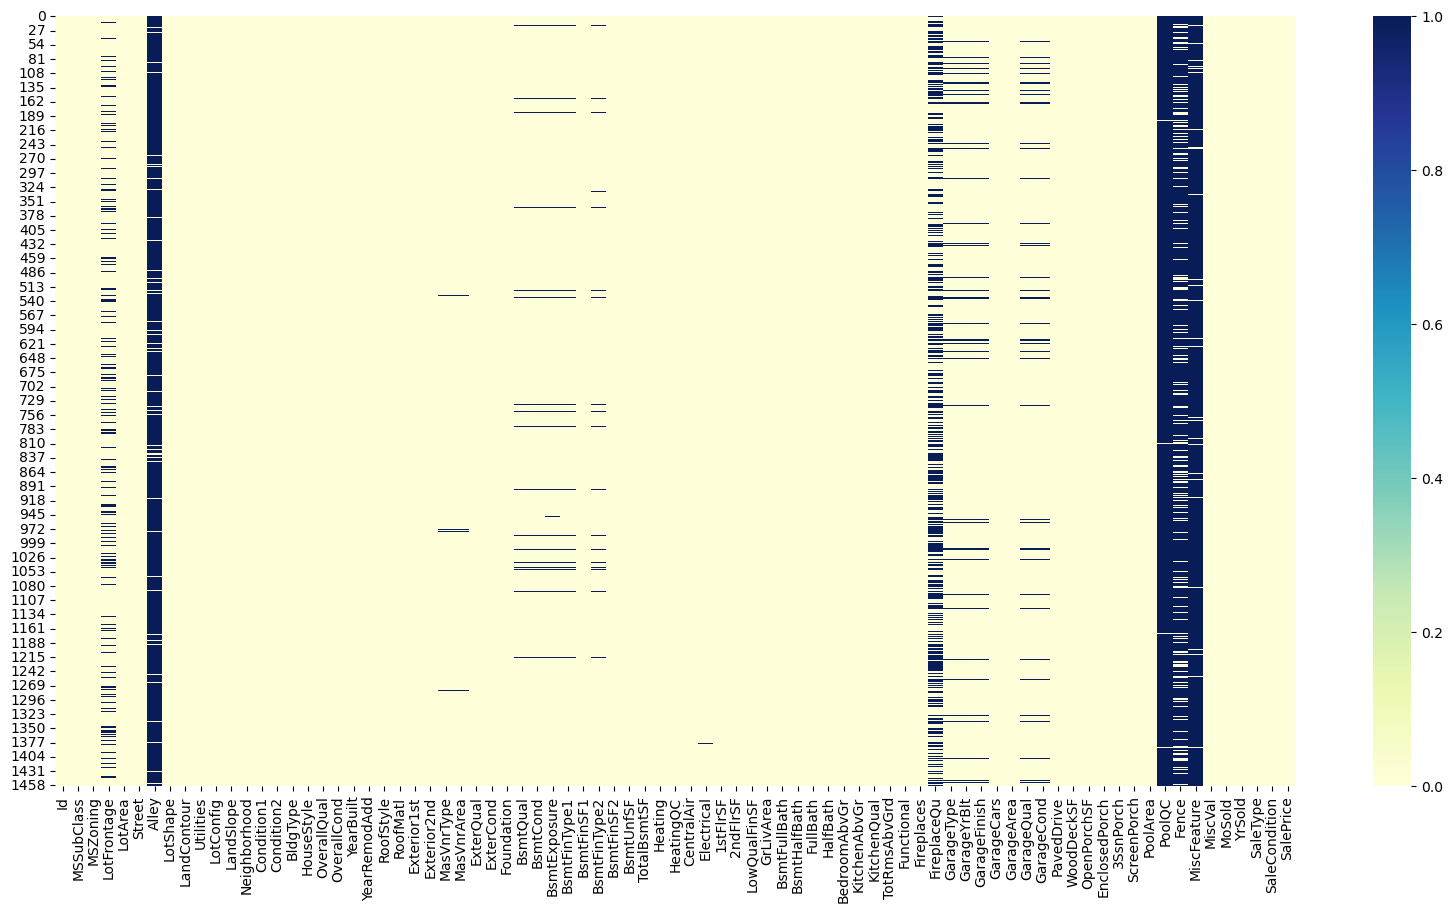

In [132]:
plt.figure(figsize= (20,10))
sns.heatmap(train_df.isnull(),cmap= 'YlGnBu')

In [133]:
null_cols = [col for col in train_df if any(train_df[col].isnull()) is True]
null_cols

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [134]:
null_cols_test = [col for col in test_df if any(test_df[col].isnull()) is True]
null_cols_test

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

<AxesSubplot:>

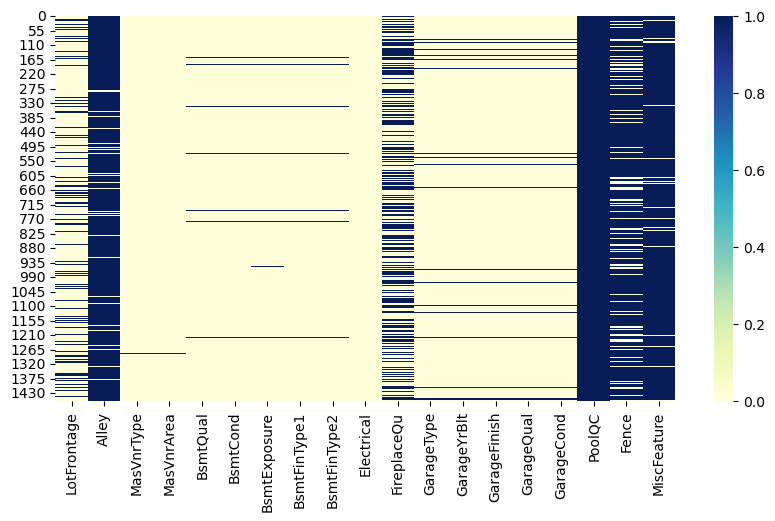

In [135]:
plt.figure(figsize= (10,5))
sns.heatmap(train_df[null_cols].isnull(),cmap= 'YlGnBu')

In [136]:
train_df['Electrical'].isnull().sum()

1

In [137]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## FEATURE ANALYSIS

In [138]:
train_df.nunique().sort_values(ascending= False)

Id            1460
LotArea       1073
GrLivArea      861
BsmtUnfSF      780
1stFlrSF       753
              ... 
HalfBath         3
Street           2
CentralAir       2
Utilities        2
Alley            2
Length: 81, dtype: int64

In [139]:
train_df.select_dtypes(include= object).nunique().sort_values(ascending= False)

Neighborhood     25
Exterior2nd      16
Exterior1st      15
SaleType          9
Condition1        9
Condition2        8
HouseStyle        8
RoofMatl          8
Functional        7
BsmtFinType2      6
Heating           6
RoofStyle         6
SaleCondition     6
BsmtFinType1      6
GarageType        6
Foundation        6
Electrical        5
FireplaceQu       5
HeatingQC         5
GarageQual        5
GarageCond        5
MSZoning          5
LotConfig         5
ExterCond         5
BldgType          5
BsmtExposure      4
MiscFeature       4
Fence             4
LotShape          4
LandContour       4
BsmtCond          4
KitchenQual       4
MasVnrType        4
ExterQual         4
BsmtQual          4
LandSlope         3
GarageFinish      3
PavedDrive        3
PoolQC            3
Utilities         2
CentralAir        2
Street            2
Alley             2
dtype: int64

In [140]:
train_df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [141]:
train_df.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [142]:
cat_var = [cols for cols in train_df if train_df[cols].dtype == 'object']
train_df[cat_var].dtypes.unique()

array([dtype('O')], dtype=object)

In [143]:
num_var = [cols for cols in train_df if train_df[cols].dtype != 'object']
train_df[num_var].dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [144]:
cat_var_test = [cols for cols in test_df if test_df[cols].dtype == 'object']
num_var_test = [cols for cols in test_df if test_df[cols].dtype != 'object']


In [145]:
train_df_obj = train_df.select_dtypes(include= object)
variables = train_df_obj.columns

unique_train_df_obj = pd.DataFrame(variables,columns= ['Variable'])

unique_vals = []
for var in variables:
    unique_vals.append(train_df_obj[var].unique())

unique_train_df_obj['Unique'] = unique_vals
unique_train_df_obj


,Variable,Unique
0,MSZoning,"[RL, RM, C (all), FV, RH]"
1,Street,"[Pave, Grvl]"
2,Alley,"[nan, Grvl, Pave]"
3,LotShape,"[Reg, IR1, IR2, IR3]"
4,LandContour,"[Lvl, Bnk, Low, HLS]"
5,Utilities,"[AllPub, NoSeWa]"
6,LotConfig,"[Inside, FR2, Corner, CulDSac, FR3]"
7,LandSlope,"[Gtl, Mod, Sev]"
8,Neighborhood,"[CollgCr, Veenker, Crawfor, NoRidge, Mitchel, ..."
9,Condition1,"[Norm, Feedr, PosN, Artery, RRAe, RRNn, RRAn, ..."


### CATEGORICAL VARIABLES

In [146]:
train_df['OverallQual'].value_counts(dropna= False).sort_values(ascending= False)

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

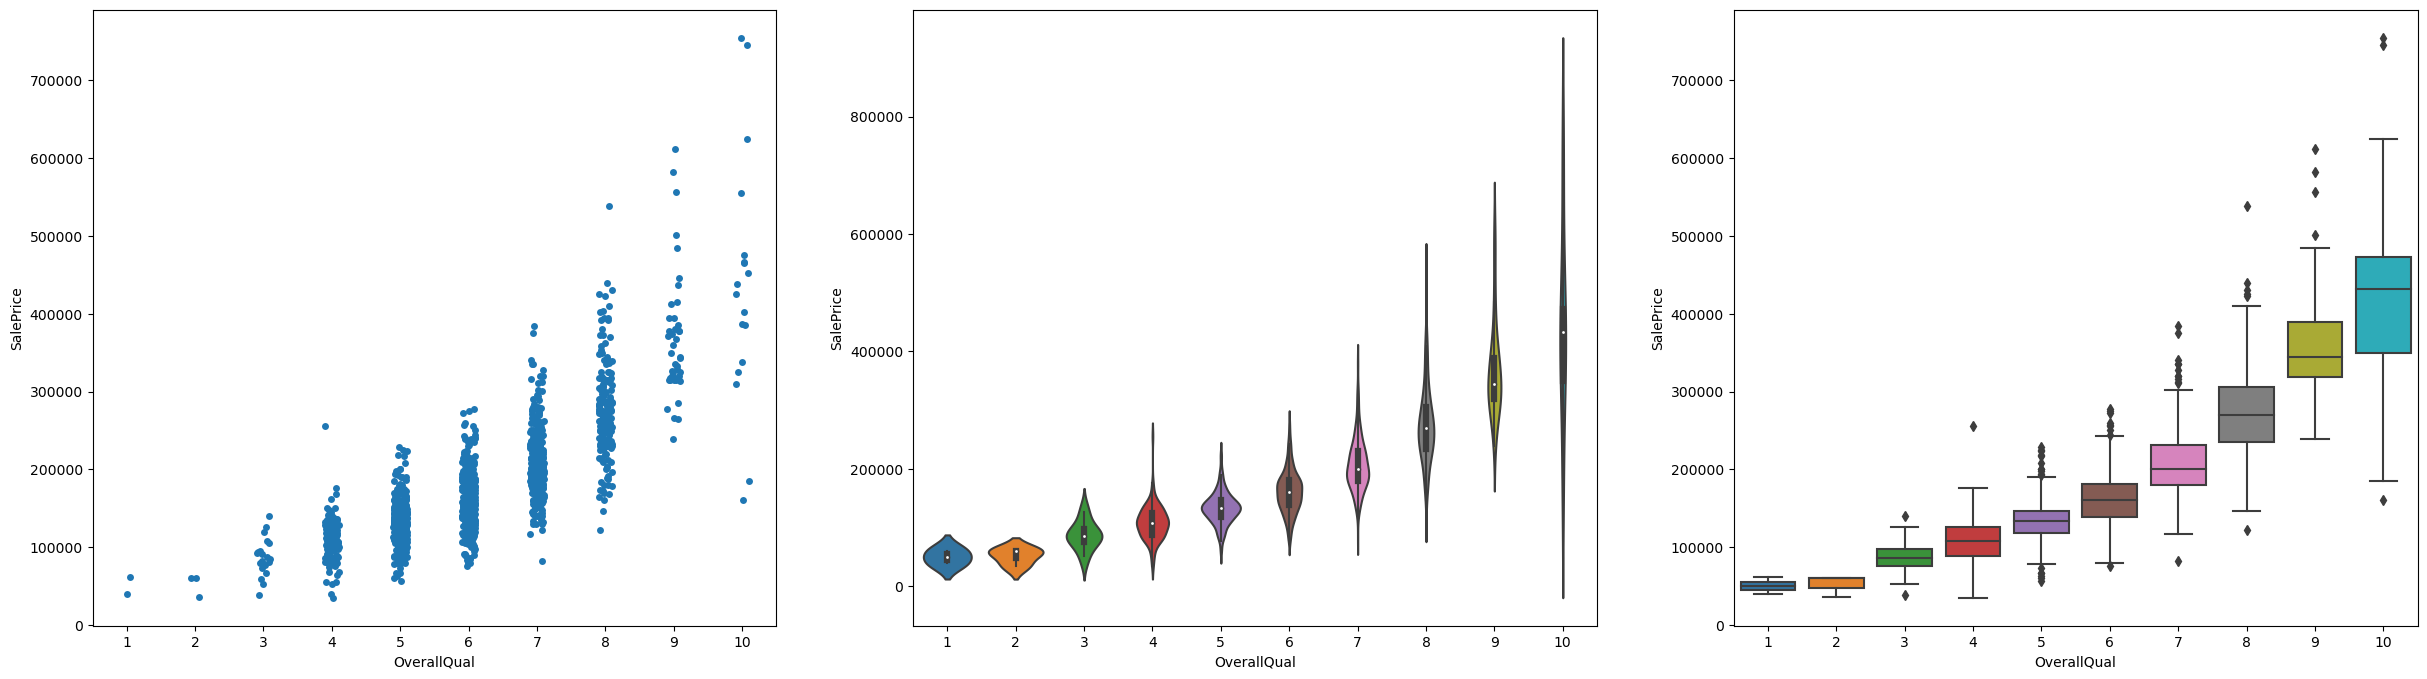

In [147]:
figure, ax = plt.subplots(1,3, figsize= (30,8))
sns.stripplot(x= 'OverallQual', y= 'SalePrice',data= train_df, ax = ax[0])
sns.violinplot(x= 'OverallQual', y= 'SalePrice',data= train_df, ax = ax[1])
sns.boxplot(x= 'OverallQual', y= 'SalePrice',data= train_df, ax = ax[2])

### NUMERICAL VARIABLES

<AxesSubplot:>

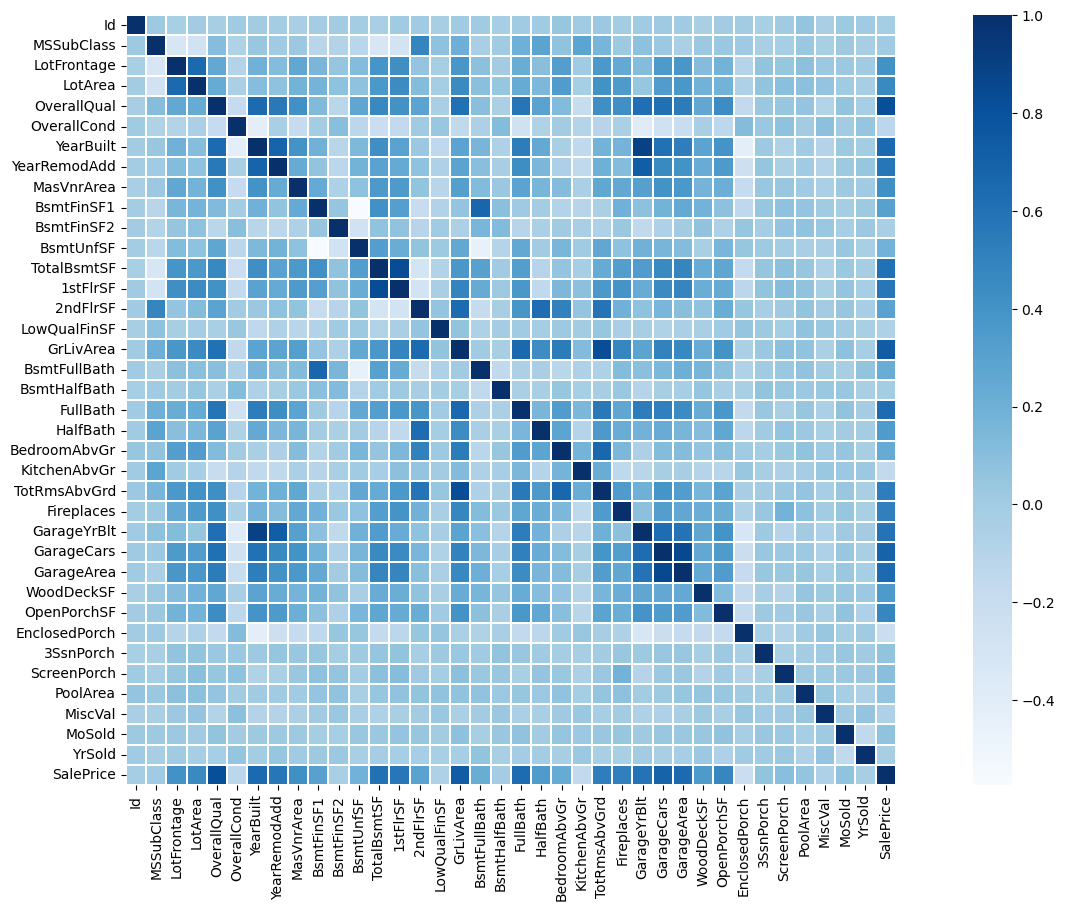

In [148]:
plt.figure(figsize= (20,10))
sns.heatmap(train_df[num_var].corr('spearman'), cmap= 'Blues',linewidths=0.2, square = True)

<AxesSubplot:>

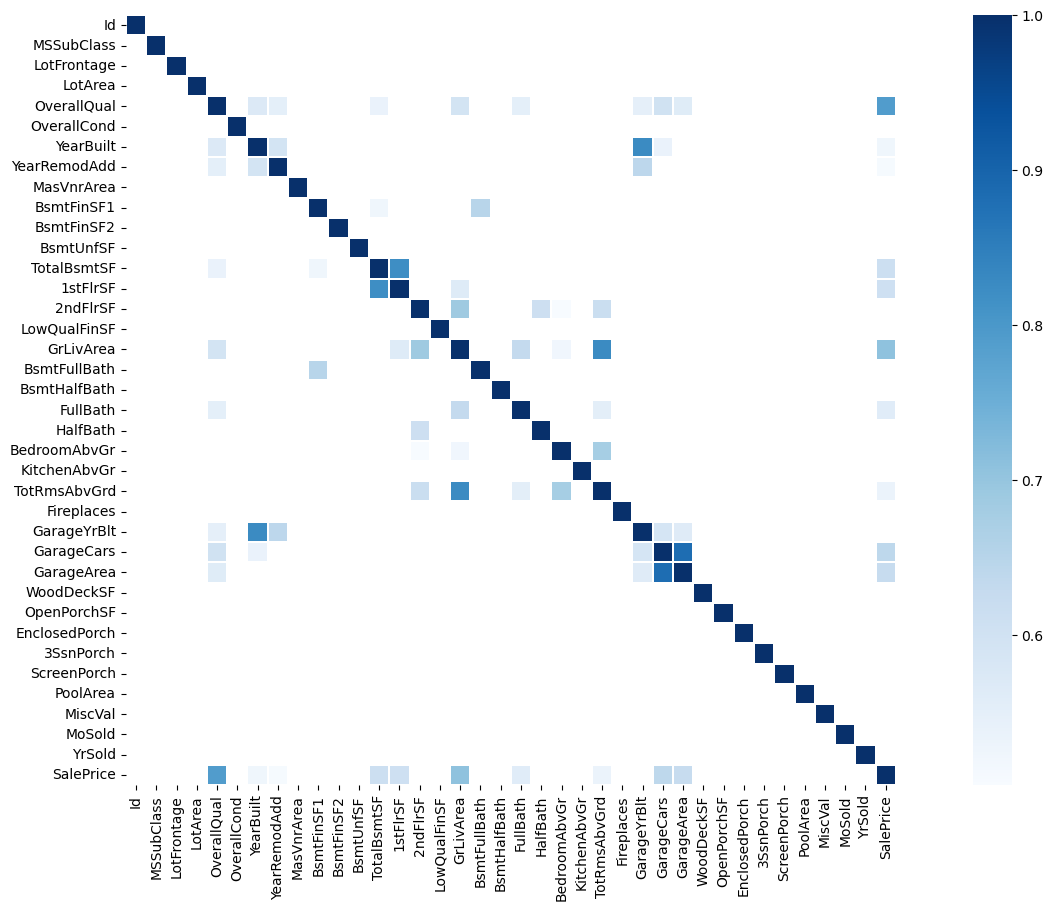

In [149]:
# Visualization of features correlated to more than .5 in training data

corr = train_df.corr()
kot = corr[(corr >= .5)]
plt.figure(figsize= (20,10))
sns.heatmap(kot, cmap= 'Blues',linewidths=0.2, square = True)

In [150]:
yrsold_v_saleprice_sum = train_df[['YrSold','SalePrice']].groupby('YrSold', as_index= False)['SalePrice'].sum().sort_values(by='YrSold', ascending= False)

In [151]:
yrsold_v_saleprice_sum

,YrSold,SalePrice
4,2010,31043893
3,2009,60648051
2,2008,53917695
1,2007,61214777
0,2006,57320530


<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

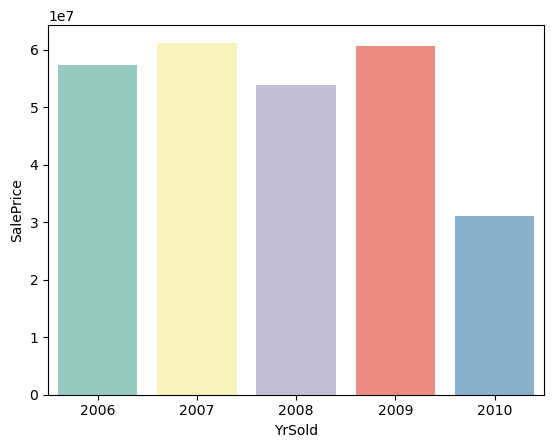

In [152]:
sns.barplot(x='YrSold', y= 'SalePrice', data= yrsold_v_saleprice_sum, palette = 'Set3')

In [153]:
sales_cor_cols = train_df.corr()['SalePrice'][(train_df.corr()['SalePrice'] > 0.3) & (train_df.corr()['SalePrice'] < 1.0)]
sales_cor_cols

LotFrontage     0.351799
OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.477493
BsmtFinSF1      0.386420
TotalBsmtSF     0.613581
1stFlrSF        0.605852
2ndFlrSF        0.319334
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
Fireplaces      0.466929
GarageYrBlt     0.486362
GarageCars      0.640409
GarageArea      0.623431
WoodDeckSF      0.324413
OpenPorchSF     0.315856
Name: SalePrice, dtype: float64

<AxesSubplot:>

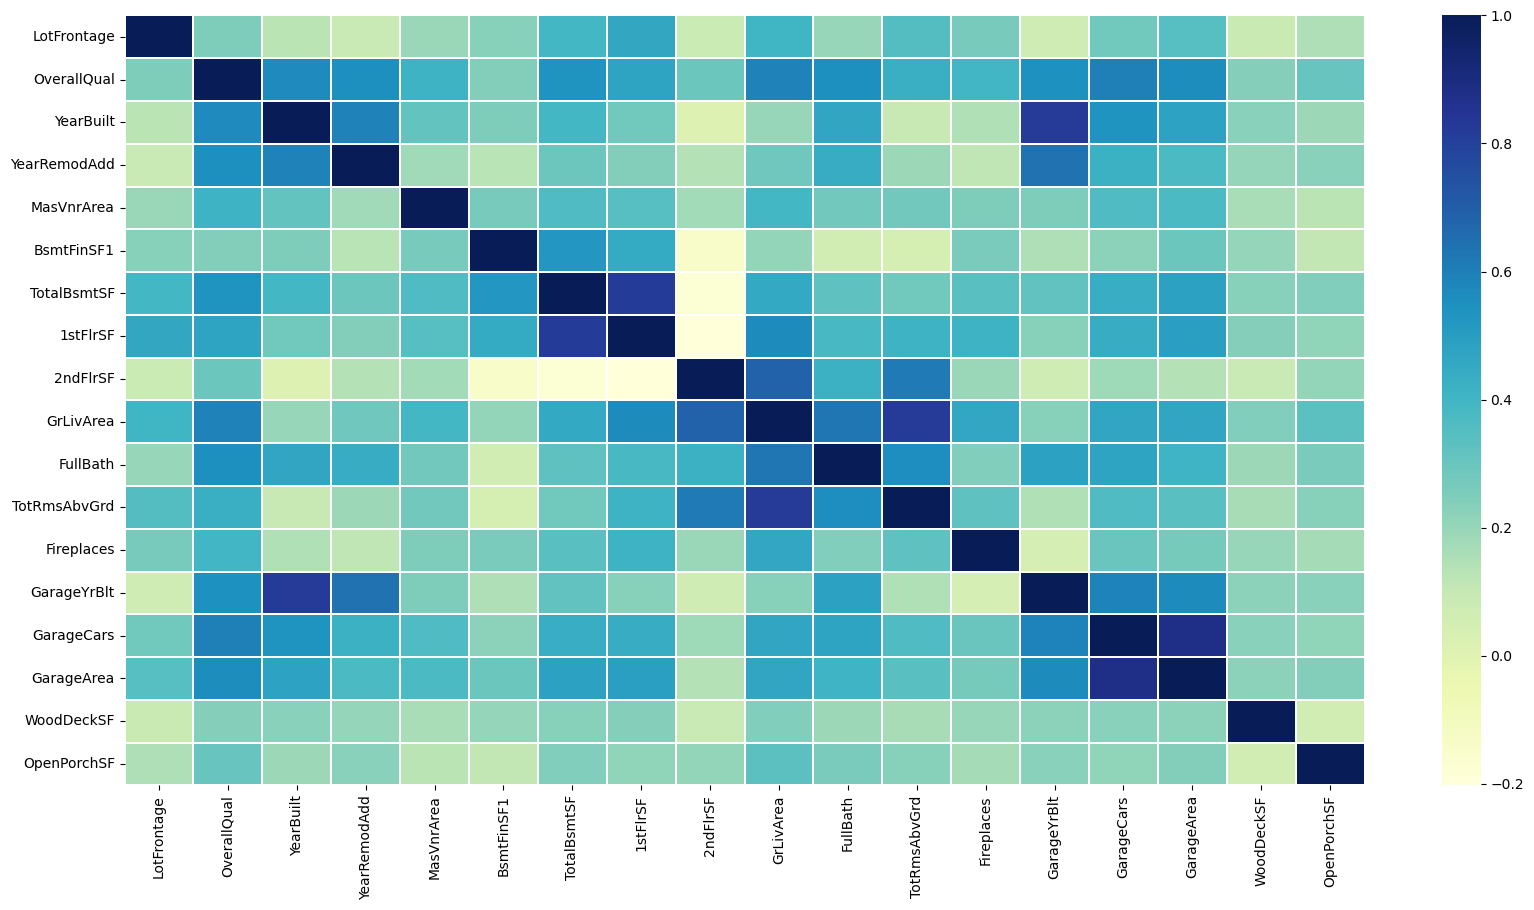

In [154]:
plt.figure(figsize= (20,10))
sns.heatmap(train_df[sales_cor_cols.index].corr(), cmap= 'YlGnBu', linewidths= .2)

In [155]:
sale_price_skew = train_df['SalePrice'].skew().round(2)
sale_price_skew

1.88

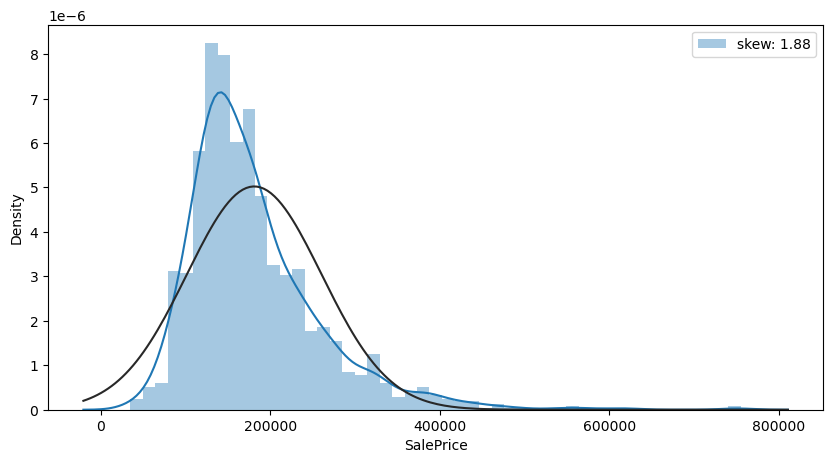

In [156]:
(mu,sigma) = norm.fit(train_df['SalePrice'])

plt.figure(figsize= (10,5))
sns.distplot(train_df['SalePrice'],fit=norm,  label= f'skew: {sale_price_skew}')
plt.legend()

### OUTLIERS DETECTION

In [157]:
#sns.pairplot(train_df)

<AxesSubplot:xlabel='GrLivArea'>

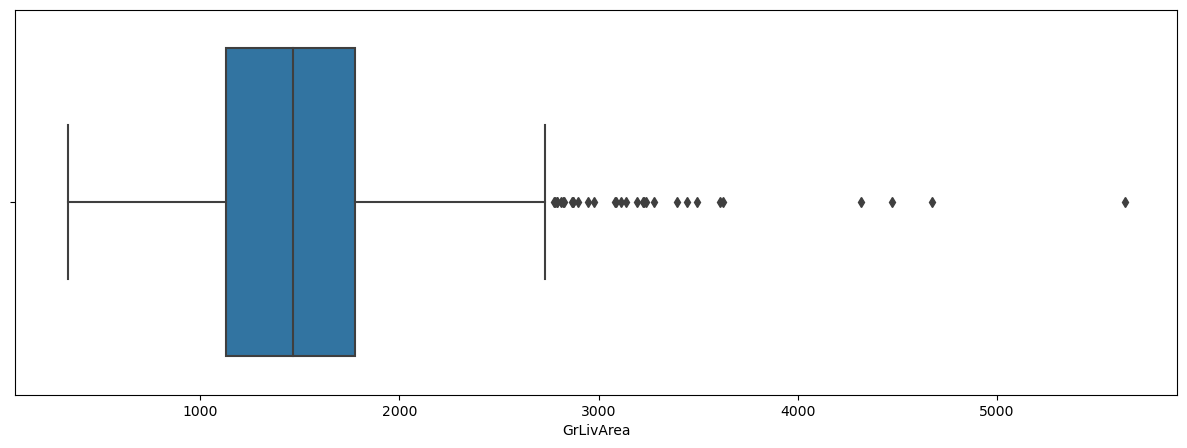

In [158]:
plt.figure(figsize= (15,5))
sns.boxplot(x= 'GrLivArea', data=train_df)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

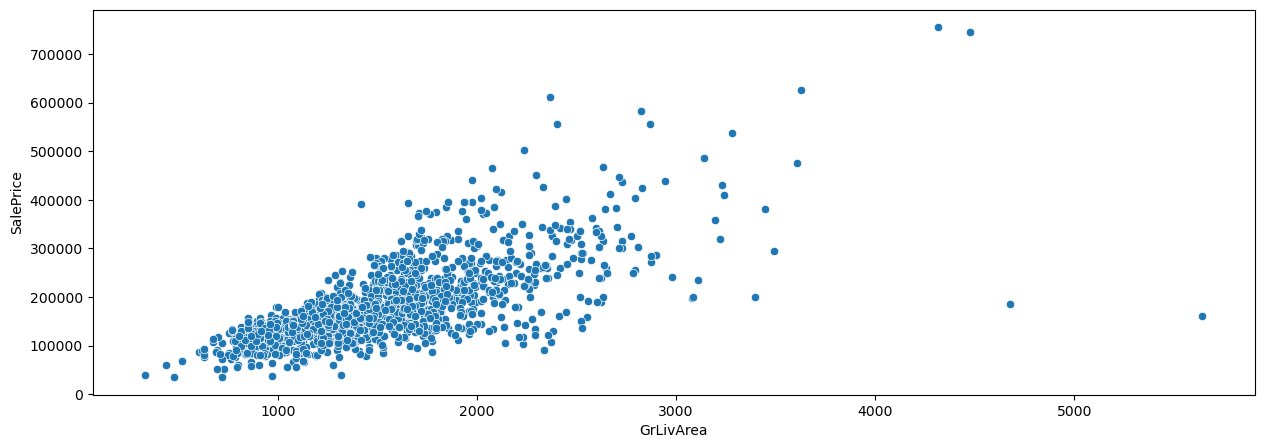

In [159]:
plt.figure(figsize= (15,5))
sns.scatterplot(y='SalePrice', x= 'GrLivArea', data=train_df)

In [160]:
# for col in num_var:
#     if col == 'SalePrice':
#         continue
#     plt.clf()
#     sns.boxplot(x= train_df[col], y= 'SalePrice', data= train_df)
#     plt.title(f'Sale Price vs {col}')
#     plt.show()

#### DROP OUTLIERS

In [161]:
# plt.figure(figsize= (15,5))
# sns.scatterplot(y='SalePrice', x= 'GrLivArea', data=train_df)

In [162]:
def outliers_present(df,nums_in_df):
    for col in nums_in_df:
        Q1 = np.percentile(df[col], 25, interpolation = 'midpoint')
        Q3 = np.percentile(df[col], 75, interpolation = 'midpoint')
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_df = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers_df


In [163]:
train_df_outliers = outliers_present(train_df, num_var)
train_df_outliers.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
11,12,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,345000
53,54,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,385000
58,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,438780
112,113,60,RL,77.0,9965,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,383970
151,152,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,New,Partial,372402


In [164]:
def drop_outliers(df, nums_in_df):
    outliers_to_drop_df = outliers_present(df,nums_in_df)
    new_df = df.drop(outliers_to_drop_df.index, axis= 0).reset_index(drop = True)
    return new_df

In [165]:
train_df_before_outlier_drop = train_df.shape

In [166]:
train_df = drop_outliers(train_df, num_var)

In [167]:
print(f'Before train_df outlier drop: {train_df_before_outlier_drop}')
print(f'After train_df outlier drop: {train_df.shape}')

Before train_df outlier drop: (1460, 81)
After train_df outlier drop: (1399, 81)


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

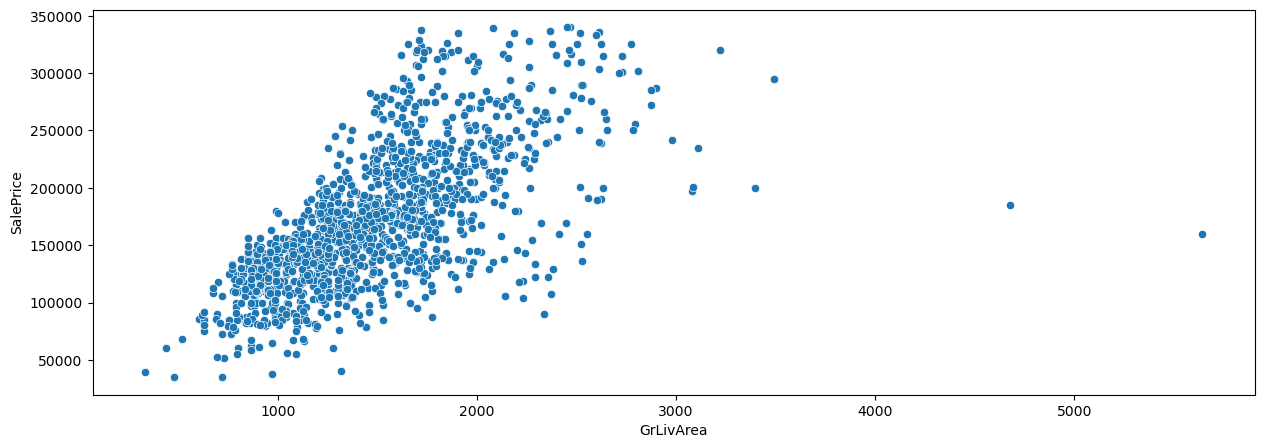

In [168]:
plt.figure(figsize= (15,5))
sns.scatterplot(y='SalePrice', x= 'GrLivArea', data=train_df)

### MISSING VALUES

In [169]:
train_df = train_df.drop('Id', axis=1)
test_df = test_df.drop('Id', axis=1)

In [170]:
num_var = [cols for cols in train_df if train_df[cols].dtype != 'object']
cat_var = [cols for cols in train_df if train_df[cols].dtype == 'object']

In [171]:
cat_var_test = [cols for cols in test_df if test_df[cols].dtype == 'object']
num_var_test = [cols for cols in test_df if test_df[cols].dtype != 'object']

<AxesSubplot:>

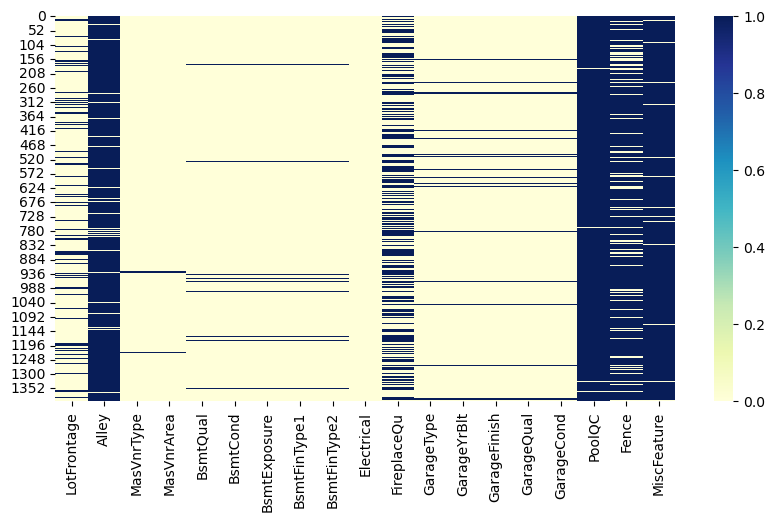

In [172]:
plt.figure(figsize= (10,5))
sns.heatmap(train_df[null_cols].isnull(),cmap= 'YlGnBu')

In [173]:
missing = train_df[null_cols].isnull().mean().sort_values(ascending= False)*100   
missing

PoolQC          99.571122
MiscFeature     96.140100
Alley           93.495354
Fence           80.200143
FireplaceQu     49.249464
LotFrontage     18.298785
GarageType       5.789850
GarageYrBlt      5.789850
GarageFinish     5.789850
GarageQual       5.789850
GarageCond       5.789850
BsmtExposure     2.716226
BsmtFinType2     2.716226
BsmtFinType1     2.644746
BsmtCond         2.644746
BsmtQual         2.644746
MasVnrArea       0.500357
MasVnrType       0.500357
Electrical       0.071480
dtype: float64

<AxesSubplot:>

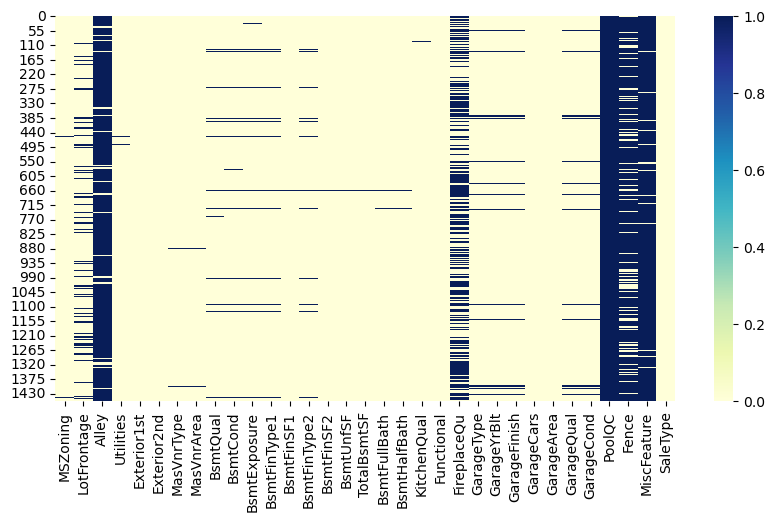

In [174]:
plt.figure(figsize= (10,5))
sns.heatmap(test_df[null_cols_test].isnull(),cmap= 'YlGnBu')

# IMPUTATION

In [175]:
none_imputer = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageType','GarageFinish',
             'GarageQual','GarageCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
             'BsmtFinType2',"MasVnrType", 'MSSubClass']

In [176]:
for col in none_imputer:
   train_df[col] = train_df[col].fillna('None')

In [177]:
for col in none_imputer:
   test_df[col] = test_df[col].fillna('None')

In [178]:
train_df[null_cols].isnull().mean().sort_values(ascending= False)*100   

LotFrontage     18.298785
GarageYrBlt      5.789850
MasVnrArea       0.500357
Electrical       0.071480
BsmtQual         0.000000
BsmtCond         0.000000
BsmtExposure     0.000000
BsmtFinType1     0.000000
BsmtFinType2     0.000000
Alley            0.000000
FireplaceQu      0.000000
GarageType       0.000000
MasVnrType       0.000000
GarageFinish     0.000000
GarageQual       0.000000
GarageCond       0.000000
PoolQC           0.000000
Fence            0.000000
MiscFeature      0.000000
dtype: float64

<AxesSubplot:>

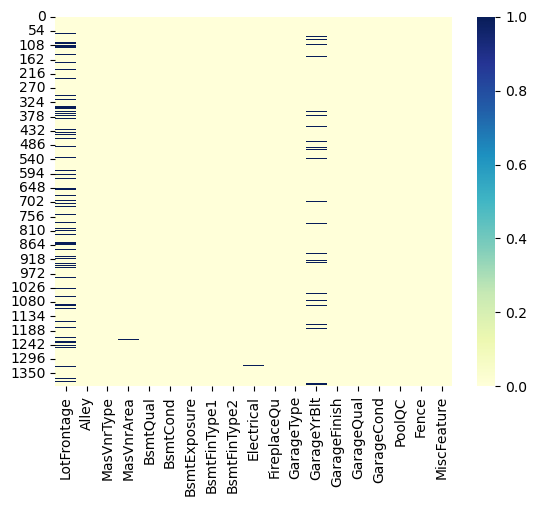

In [179]:
sns.heatmap(train_df[null_cols].isnull(), cmap= 'YlGnBu')

In [180]:
zero_imputer = [ 'GarageYrBlt', 'GarageArea', 'GarageCars','BsmtFinSF1', 'BsmtFinSF2', 
                'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', "MasVnrArea"]

In [181]:
for col in zero_imputer:
    train_df[col] = train_df[col].fillna(0)

In [182]:
for col in zero_imputer:
    test_df[col] = test_df[col].fillna(0)

In [183]:
train_df[null_cols].isnull().mean().sort_values(ascending= False)*100   

LotFrontage     18.298785
Electrical       0.071480
MasVnrType       0.000000
GarageType       0.000000
Fence            0.000000
PoolQC           0.000000
GarageCond       0.000000
GarageQual       0.000000
GarageFinish     0.000000
GarageYrBlt      0.000000
FireplaceQu      0.000000
MasVnrArea       0.000000
Alley            0.000000
BsmtFinType2     0.000000
BsmtFinType1     0.000000
BsmtExposure     0.000000
BsmtCond         0.000000
BsmtQual         0.000000
MiscFeature      0.000000
dtype: float64

In [184]:
mode_imputer = [ 'MSZoning','Electrical','KitchenQual','Exterior1st',
                'Exterior2nd','SaleType','Functional','Utilities']

In [185]:
for col in mode_imputer:
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])

In [186]:
for col in mode_imputer:
    test_df[col] = test_df[col].fillna(test_df[col].mode()[0])

In [187]:
train_df[null_cols].isnull().mean().sort_values(ascending= False)*100   

LotFrontage     18.298785
FireplaceQu      0.000000
Fence            0.000000
PoolQC           0.000000
GarageCond       0.000000
GarageQual       0.000000
GarageFinish     0.000000
GarageYrBlt      0.000000
GarageType       0.000000
Electrical       0.000000
Alley            0.000000
BsmtFinType2     0.000000
BsmtFinType1     0.000000
BsmtExposure     0.000000
BsmtCond         0.000000
BsmtQual         0.000000
MasVnrArea       0.000000
MasVnrType       0.000000
MiscFeature      0.000000
dtype: float64

In [188]:
train_df["LotFrontage"] = train_df.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [189]:
test_df["LotFrontage"] = test_df.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [190]:
train_df[null_cols].isnull().mean().sort_values(ascending= False)*100   

LotFrontage     0.0
FireplaceQu     0.0
Fence           0.0
PoolQC          0.0
GarageCond      0.0
GarageQual      0.0
GarageFinish    0.0
GarageYrBlt     0.0
GarageType      0.0
Electrical      0.0
Alley           0.0
BsmtFinType2    0.0
BsmtFinType1    0.0
BsmtExposure    0.0
BsmtCond        0.0
BsmtQual        0.0
MasVnrArea      0.0
MasVnrType      0.0
MiscFeature     0.0
dtype: float64

In [191]:
test_df[null_cols_test].isnull().mean().sort_values(ascending= False)*100   

MSZoning        0.0
BsmtFullBath    0.0
MiscFeature     0.0
Fence           0.0
PoolQC          0.0
GarageCond      0.0
GarageQual      0.0
GarageArea      0.0
GarageCars      0.0
GarageFinish    0.0
GarageYrBlt     0.0
GarageType      0.0
FireplaceQu     0.0
Functional      0.0
KitchenQual     0.0
BsmtHalfBath    0.0
TotalBsmtSF     0.0
LotFrontage     0.0
BsmtUnfSF       0.0
BsmtFinSF2      0.0
BsmtFinType2    0.0
BsmtFinSF1      0.0
BsmtFinType1    0.0
BsmtExposure    0.0
BsmtCond        0.0
BsmtQual        0.0
MasVnrArea      0.0
MasVnrType      0.0
Exterior2nd     0.0
Exterior1st     0.0
Utilities       0.0
Alley           0.0
SaleType        0.0
dtype: float64

# ENCODING

In [192]:
combined_df = pd.concat([train_df,test_df], axis=0).reset_index(drop= True)

In [193]:
combined_df.isnull().sum().sort_values(ascending= False)

SalePrice      1459
MSZoning          0
GarageYrBlt       0
GarageType        0
FireplaceQu       0
               ... 
MasVnrArea        0
MasVnrType        0
Exterior2nd       0
Exterior1st       0
CentralAir        0
Length: 80, dtype: int64

In [194]:
combined_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000.0


In [195]:
cat_var_combined = [cols for cols in combined_df if combined_df[cols].dtype == 'object']

In [196]:
for col in cat_var_combined:
    print(combined_df[col].value_counts(dropna= False))
    print()

RL         2211
RM          458
FV          138
RH           26
C (all)      25
Name: MSZoning, dtype: int64

Pave    2846
Grvl      12
Name: Street, dtype: int64

None    2660
Grvl     120
Pave      78
Name: Alley, dtype: int64

Reg    1832
IR1     941
IR2      70
IR3      15
Name: LotShape, dtype: int64

Lvl    2572
Bnk     117
HLS     111
Low      58
Name: LandContour, dtype: int64

AllPub    2857
NoSeWa       1
Name: Utilities, dtype: int64

Inside     2089
Corner      503
CulDSac     168
FR2          84
FR3          14
Name: LotConfig, dtype: int64

Gtl    2722
Mod     121
Sev      15
Name: LandSlope, dtype: int64

NAmes      442
CollgCr    265
OldTown    238
Edwards    194
Somerst    180
Gilbert    164
Sawyer     151
NridgHt    139
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    100
IDOTRR      93
Timber      69
NoRidge     60
SWISU       48
ClearCr     44
StoneBr     42
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     23
NPkVill     23
Blueste     

In [197]:
from sklearn.preprocessing import LabelEncoder
lbl_encode = LabelEncoder()

In [198]:
for col in cat_var_combined:
    combined_df[col] = lbl_encode.fit_transform(combined_df[col])

In [199]:
combined_df[cat_var_combined].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,1,1,3,3,0,4,0,5,2,...,1,2,5,5,2,3,4,1,8,4
1,3,1,1,3,3,0,2,0,24,1,...,1,2,5,5,2,3,4,1,8,4
2,3,1,1,0,3,0,4,0,5,2,...,1,2,5,5,2,3,4,1,8,4
3,3,1,1,0,3,0,0,0,6,2,...,5,3,5,5,2,3,4,1,8,0
4,3,1,1,0,3,0,2,0,15,2,...,1,2,5,5,2,3,4,1,8,4


In [200]:
combined_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,1,3,3,0,4,...,0,3,4,1,0,2,2008,8,4,208500.0
1,20,3,80.0,9600,1,1,3,3,0,2,...,0,3,4,1,0,5,2007,8,4,181500.0
2,60,3,68.0,11250,1,1,0,3,0,4,...,0,3,4,1,0,9,2008,8,4,223500.0
3,70,3,60.0,9550,1,1,0,3,0,0,...,0,3,4,1,0,2,2006,8,0,140000.0
4,60,3,84.0,14260,1,1,0,3,0,2,...,0,3,4,1,0,12,2008,8,4,250000.0


# SPLIT DATASET

In [201]:
train_df = combined_df[:len(train_df)]
test_df = combined_df[len(train_df):]
test_df = test_df.drop('SalePrice', axis=1)

In [202]:
for i in train_df.columns:
    train_df[i] = train_df[i].astype('int32')
    
for i in test_df.columns:
    test_df[i] = test_df[i].astype('int32')

In [203]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65,8450,1,1,3,3,0,4,...,0,3,4,1,0,2,2008,8,4,208500
1,20,3,80,9600,1,1,3,3,0,2,...,0,3,4,1,0,5,2007,8,4,181500
2,60,3,68,11250,1,1,0,3,0,4,...,0,3,4,1,0,9,2008,8,4,223500
3,70,3,60,9550,1,1,0,3,0,0,...,0,3,4,1,0,2,2006,8,0,140000
4,60,3,84,14260,1,1,0,3,0,2,...,0,3,4,1,0,12,2008,8,4,250000


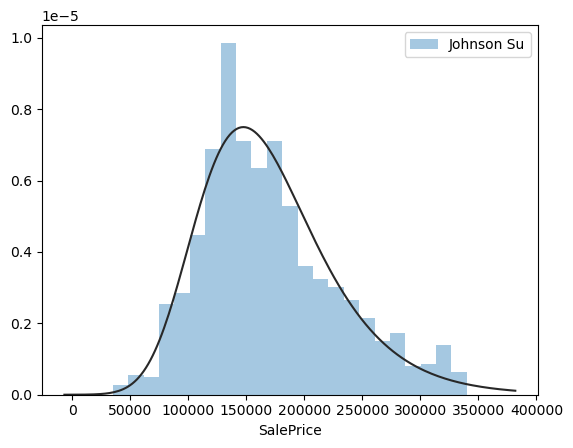

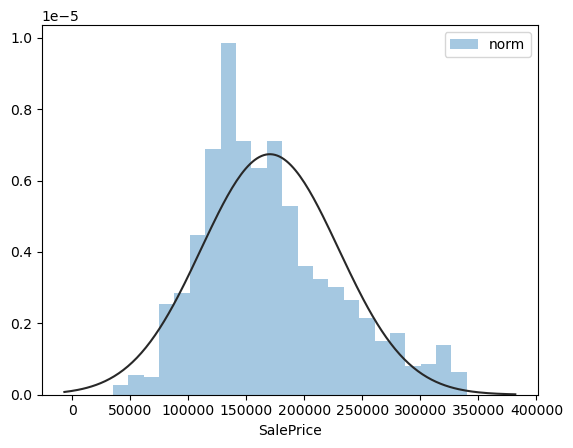

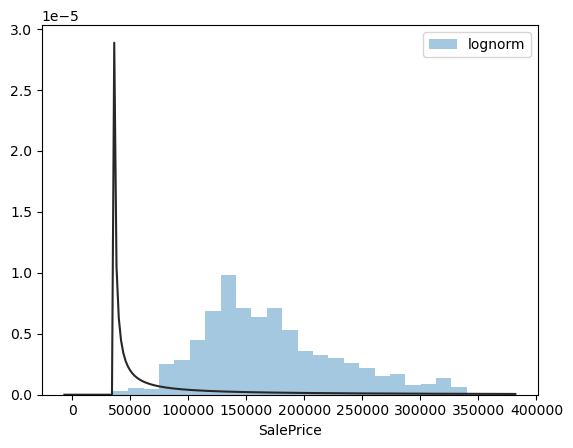

In [204]:
plt.figure(1)
sns.distplot(train_df['SalePrice'], kde= False, fit= johnsonsu, label= f'Johnson Su')
plt.legend()
plt.figure(2)
sns.distplot(train_df['SalePrice'], kde= False, fit= norm, label= 'norm')
plt.legend()
plt.figure(3)
sns.distplot(train_df['SalePrice'], kde= False, fit= lognorm, label= 'lognorm')
plt.legend()

# # NORMALIZATION & SCALING

In [205]:
skew_train =train_df.skew()
skew_test =test_df.skew()
skewness = pd.DataFrame({'Skew_Train' :skew_train,
                          'Skew_Test': skew_test})
skewness.head(10)

,Skew_Train,Skew_Test
1stFlrSF,1.437226,1.558195
2ndFlrSF,0.749328,0.912883
3SsnPorch,10.710296,12.524216
Alley,-0.312777,-0.899765
BedroomAbvGr,0.279849,0.436623
BldgType,2.190747,2.144973
BsmtCond,-2.919305,-2.791715
BsmtExposure,-1.203756,-1.133275
BsmtFinSF1,1.874497,1.166330
BsmtFinSF2,4.219695,4.042954


In [206]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method= 'yeo-johnson')

for i in train_df.columns:
    train_df[i] = scaler.fit_transform(train_df[i].values.reshape(-1,1))
    
for i in test_df.columns:
    test_df[i] = scaler.fit_transform(test_df[i].values.reshape(-1,1))

In [207]:
skew_train_scaled =train_df.skew()
skew_test_scaled =test_df.skew()
skewness = pd.DataFrame({'Skew_Train' :skew_train,
                         'Skew Train Scaled': skew_train_scaled,
                          'Skew_Test': skew_test,
                          'Skew Test Scaled': skew_test_scaled
                          })

skewness.head(10)

,Skew_Train,Skew Train Scaled,Skew_Test,Skew Test Scaled
1stFlrSF,1.437226,0.000000,1.558195,-0.000745
2ndFlrSF,0.749328,0.290899,0.912883,0.310510
3SsnPorch,10.710296,7.793401,12.524216,10.462542
Alley,-0.312777,0.723275,-0.899765,0.795896
BedroomAbvGr,0.279849,0.124890,0.436623,0.063803
BldgType,2.190747,1.759159,2.144973,1.722232
BsmtCond,-2.919305,-2.604651,-2.791715,-2.458913
BsmtExposure,-1.203756,-0.670191,-1.133275,-0.609009
BsmtFinSF1,1.874497,-0.405345,1.166330,-0.390985
BsmtFinSF2,4.219695,2.382325,4.042954,2.292974


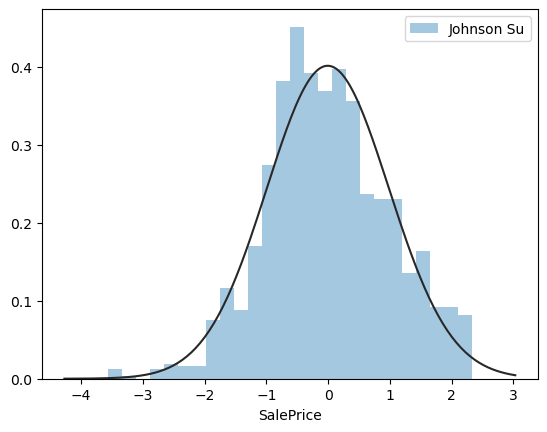

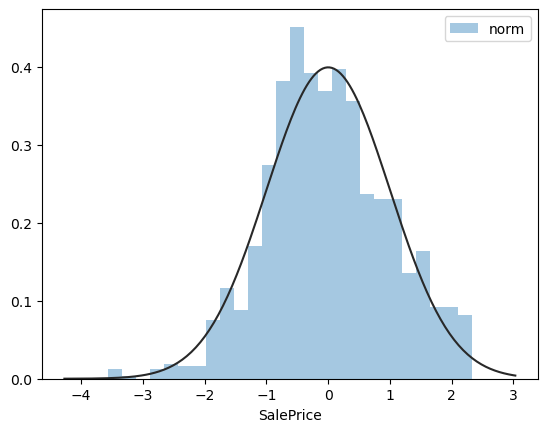

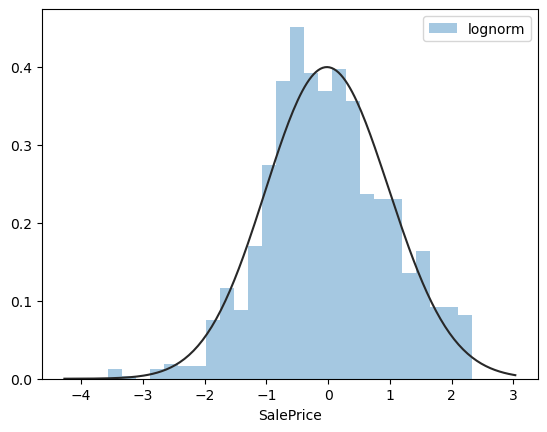

In [208]:
plt.figure(1)
sns.distplot(train_df['SalePrice'], kde= False, fit= johnsonsu, label= f'Johnson Su')
plt.legend()
plt.figure(2)
sns.distplot(train_df['SalePrice'], kde= False, fit= norm, label= 'norm')
plt.legend()
plt.figure(3)
sns.distplot(train_df['SalePrice'], kde= False, fit= lognorm, label= 'lognorm')
plt.legend()

In [209]:
x_train = train_df.drop('SalePrice', axis= 1)
y_train = train_df['SalePrice']

x_test = test_df.copy()

In [210]:
y_train

0       0.726328
1       0.311205
2       0.940406
3      -0.423966
4       1.294558
          ...   
1394    0.204683
1395    0.748226
1396    1.501588
1397   -0.382748
1398   -0.280437
Name: SalePrice, Length: 1399, dtype: float64

In [211]:
x_train.shape

(1399, 79)

In [212]:
y_train.shape

(1399,)

In [213]:
y_train.dtype

dtype('float64')

In [214]:
x_test.shape

(1459, 79)

In [215]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()

In [216]:
for i in x_train.columns:
    x_train[i] = robust_scaler.fit_transform(x_train[i].values.reshape(-1,1))
      
for i in x_test.columns:
    x_test[i] = robust_scaler.transform(x_test[i].values.reshape(-1,1))


# MODELLING

In [217]:
from sklearn.linear_model import LinearRegression, Lasso, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from mlxtend.regressor import StackingRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

In [218]:
lasso_reg = Lasso()
bayesian_ridge = BayesianRidge()
lasso_ic = LassoLarsIC()
grd_boost = GradientBoostingRegressor()
random_forest = RandomForestRegressor()
cat_boost = CatBoostRegressor()
light_gbm = LGBMRegressor(objective='regression')
stacked_reg = StackingRegressor(regressors=(CatBoostRegressor(),
                                          LinearRegression(),
                                          BayesianRidge(),
                                          GradientBoostingRegressor()),
                              meta_regressor = CatBoostRegressor(),
                              use_features_in_secondary = True)

In [219]:
regression_algorithms = [lasso_reg,bayesian_ridge,lasso_ic,grd_boost,random_forest,cat_boost,light_gbm,stacked_reg ]

In [220]:
regression_algo_names = ['Lasso','Bayesian Ridge','Lasso Lars IC',
          'Gradient Boosting Regressor','Random Forest Regressor',
                         'Cat Boost','Light Gbm','Stacked Regressor']


## KFOLD CV

In [221]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [222]:
k_fold = KFold(n_splits=10, shuffle= True, random_state=42)

In [223]:
'neg_root_mean_squared_error'

'neg_root_mean_squared_error'

In [224]:
kfold_cv_rmse = []
for algo in regression_algorithms:
    kfold_cv_rmse.append(np.sqrt(-cross_val_score(algo, x_train, y_train, cv= k_fold, n_jobs=1, scoring= 'neg_mean_squared_error', error_score= "raise")))
    

Learning rate set to 0.04246
0:	learn: 0.9762162	total: 5.05ms	remaining: 5.05s
1:	learn: 0.9524536	total: 8.74ms	remaining: 4.36s
2:	learn: 0.9278028	total: 12.4ms	remaining: 4.12s
3:	learn: 0.9025740	total: 15.7ms	remaining: 3.9s
4:	learn: 0.8809219	total: 19ms	remaining: 3.79s
5:	learn: 0.8582709	total: 22.5ms	remaining: 3.73s
6:	learn: 0.8359448	total: 26ms	remaining: 3.69s
7:	learn: 0.8145890	total: 29.8ms	remaining: 3.7s
8:	learn: 0.7939297	total: 33.1ms	remaining: 3.64s
9:	learn: 0.7760175	total: 36.4ms	remaining: 3.6s
10:	learn: 0.7589819	total: 39.7ms	remaining: 3.57s
11:	learn: 0.7410079	total: 43.1ms	remaining: 3.54s
12:	learn: 0.7243538	total: 46.5ms	remaining: 3.53s
13:	learn: 0.7070237	total: 50.7ms	remaining: 3.57s
14:	learn: 0.6917992	total: 54.2ms	remaining: 3.56s
15:	learn: 0.6756324	total: 57.8ms	remaining: 3.56s
16:	learn: 0.6621202	total: 61.2ms	remaining: 3.54s
17:	learn: 0.6482059	total: 64.4ms	remaining: 3.51s
18:	learn: 0.6350943	total: 68.2ms	remaining: 3.52s


In [225]:
kfold_cv_rmse

[array([0.94923314, 0.86717934, 0.88729362, 0.93431061, 0.96405523,
        1.06282439, 0.82888294, 0.96517978, 0.97635529, 1.03748623]),
 array([0.34474941, 0.34970407, 0.31862826, 0.32524096, 0.38468341,
        0.35052969, 0.43180395, 0.32012963, 0.32575429, 0.57527761]),
 array([0.3453239 , 0.34547004, 0.31369158, 0.32599857, 0.37799619,
        0.3403984 , 0.42375981, 0.31656301, 0.33096357, 0.56727842]),
 array([0.32421306, 0.34800319, 0.30207498, 0.34275038, 0.39278731,
        0.33835736, 0.31211032, 0.31791208, 0.31749976, 0.41905419]),
 array([0.36962473, 0.32095991, 0.30161429, 0.36342818, 0.41721369,
        0.36840386, 0.32436293, 0.35487066, 0.37286217, 0.44667114]),
 array([0.28113024, 0.31275947, 0.27076009, 0.31018196, 0.36839809,
        0.32204051, 0.29301607, 0.29764626, 0.28908903, 0.40192412]),
 array([0.33694874, 0.32238125, 0.30340871, 0.33430664, 0.39309964,
        0.32409391, 0.31125891, 0.32026685, 0.34049974, 0.43680935]),
 array([0.28188473, 0.31957568, 0.

In [226]:
cv_mean = []
cv_std_dev = []
for results in kfold_cv_rmse:
    cv_mean.append(results.mean())
    cv_std_dev.append(results.std())

In [227]:
models_results = pd.DataFrame(
     {
        'Model': regression_algo_names,
        'CV RMSE Mean': cv_mean,
        'CV RMSE Std Dev': cv_std_dev
      }
     )

models_results.sort_values(by= 'CV RMSE Mean', ascending= False, ignore_index= True)

,Model,CV RMSE Mean,CV RMSE Std Dev
0,Lasso,0.947280,0.068658
1,Bayesian Ridge,0.372650,0.075246
2,Lasso Lars IC,0.368744,0.073096
3,Random Forest Regressor,0.364001,0.041467
4,Light Gbm,0.342307,0.039113
5,Gradient Boosting Regressor,0.341476,0.035423
6,Stacked Regressor,0.315677,0.035954
7,Cat Boost,0.314695,0.038787


Text(0, 0.5, 'Regressors')

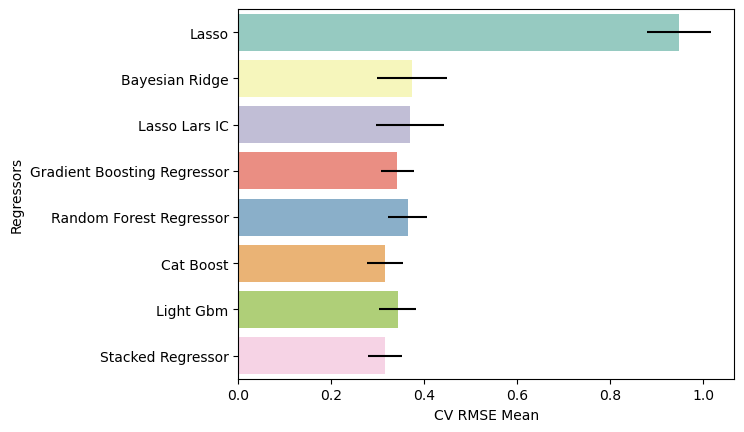

In [228]:
sns.barplot(x= 'CV RMSE Mean',y= 'Model',data= models_results, palette = 'Set3', **{'xerr': cv_std_dev})
plt.ylabel('Regressors')

In [229]:
# Cat Boost Regressor
cat_model = cat_boost.fit(x_train,y_train,verbose = 0)

In [230]:
# cat_pred = cat_model.predict(X_val)
# cat_score = rmse(y_val, cat_pred)
# cat_score

# HYPERPARAMETER TUNING - CAT BOOST

In [231]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [232]:
# Catboost default paramters
cat_model.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'random_seed': 0,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'RMSE',
 'learning_rate': 0.04317399859428406,
 'score_function': '

In [233]:
# grid = {'iterations': [1000,6000],
#         'learning_rate': [0.05, 0.005, 0.0005],
#         'depth': [4, 6, 10],
#         'l2_leaf_reg': [1, 3, 5, 9]}

# final_model = CatBoostRegressor()
# randomized_search_result = final_model.randomized_search(grid,
#                                                    X = x_train,
#                                                    y= y_train,
#                                                    verbose = False,
#                                                    plot=True)

In [234]:
grid = {'iterations': [10,20],
        'learning_rate': [0.05, 0.005, 0.0005],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 9]}

cat_boost_grid_cv = GridSearchCV(cat_boost, param_grid = grid, scoring= 'neg_mean_squared_error', 
                               cv = k_fold, verbose= 5, n_jobs = -1)

In [235]:
cat_boost_grid_cv.fit(x_train,y_train,early_stopping_rounds=3)

Fitting 10 folds for each of 72 candidates, totalling 720 fits
4:	learn: 0.9989867	total: 336ms	remaining: 1.01s
5:	learn: 0.9963317	total: 412ms	remaining: 960ms
6:	learn: 0.9935520	total: 494ms	remaining: 917ms
7:	learn: 0.9909926	total: 574ms	remaining: 861ms
8:	learn: 0.9884800	total: 632ms	remaining: 772ms
9:	learn: 0.9857368	total: 693ms	remaining: 693ms
10:	learn: 0.9832658	total: 758ms	remaining: 620ms
11:	learn: 0.9805672	total: 826ms	remaining: 551ms
12:	learn: 0.9782292	total: 892ms	remaining: 481ms
13:	learn: 0.9757061	total: 959ms	remaining: 411ms
14:	learn: 0.9731775	total: 995ms	remaining: 332ms
15:	learn: 0.9707677	total: 1.06s	remaining: 265ms
16:	learn: 0.9683554	total: 1.13s	remaining: 199ms
17:	learn: 0.9657957	total: 1.19s	remaining: 132ms
18:	learn: 0.9634450	total: 1.26s	remaining: 66.2ms
19:	learn: 0.9608648	total: 1.32s	remaining: 0us
[CV 7/10] END depth=10, iterations=20, l2_leaf_reg=9, learning_rate=0.005;, score=-0.701 total time=   1.4s
0:	learn: 0.9948522	

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=<catboost.core.CatBoostRegressor object at 0x7ff95d6da690>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 10], 'iterations': [10, 20],
                         'l2_leaf_reg': [1, 3, 5, 9],
                         'learning_rate': [0.05, 0.005, 0.0005]},
             scoring='neg_mean_squared_error', verbose=5)

In [236]:
# lasso_alphas = np.logspace(-4, -0.5, 30)
# grid = {
#     'alpha': lasso_alphas
#     } 

# lasso_grid_cv = GridSearchCV(lasso_reg, param_grid = grid, scoring= 'neg_root_mean_squared_error', 
#                                cv = k_fold, verbose= 5, n_jobs = -1)

# lasso_grid_cv.fit(x_train,y_train)

In [237]:
cat_boost_grid_cv.best_score_

-0.34297269001673547

In [238]:
cat_boost_grid_cv.best_params_

{'depth': 6, 'iterations': 20, 'l2_leaf_reg': 1, 'learning_rate': 0.05}

In [239]:
prediction_cat = cat_boost_grid_cv.predict(x_test)
prediction_cat

array([-0.5119149 , -0.20881169,  0.14635861, ..., -0.23025775,
       -0.63489689,  0.74815882])

14:	learn: 0.9963678	total: 918ms	remaining: 306ms
15:	learn: 0.9960942	total: 978ms	remaining: 244ms
16:	learn: 0.9958402	total: 1.04s	remaining: 183ms
17:	learn: 0.9955780	total: 1.11s	remaining: 123ms
18:	learn: 0.9953097	total: 1.15s	remaining: 60.7ms
19:	learn: 0.9950247	total: 1.22s	remaining: 0us
[CV 8/10] END depth=10, iterations=20, l2_leaf_reg=9, learning_rate=0.0005;, score=-0.989 total time=   1.3s
0:	learn: 0.9914193	total: 60.8ms	remaining: 1.16s
1:	learn: 0.9911672	total: 117ms	remaining: 1.05s
2:	learn: 0.9909398	total: 178ms	remaining: 1.01s
3:	learn: 0.9906656	total: 199ms	remaining: 796ms
4:	learn: 0.9903858	total: 275ms	remaining: 826ms
5:	learn: 0.9900700	total: 289ms	remaining: 675ms
6:	learn: 0.9898119	total: 359ms	remaining: 667ms
7:	learn: 0.9895271	total: 421ms	remaining: 631ms
8:	learn: 0.9892992	total: 485ms	remaining: 593ms
9:	learn: 0.9890470	total: 551ms	remaining: 551ms
10:	learn: 0.9888101	total: 613ms	remaining: 502ms
11:	learn: 0.9885817	total: 679ms	

In [ ]:
submission = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
submission['SalePrice'] = prediction_cat

In [ ]:
submission.to_csv('submission.csv', index=False)